In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import logging
logging.basicConfig(level=logging.WARN)

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline

from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif,f_classif,VarianceThreshold

from sklearn.linear_model import LogisticRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.metrics import auc,roc_curve,roc_auc_score

import mlflow
import mlflow.sklearn
from urllib.parse import urlparse

from imblearn.over_sampling import SMOTE,SMOTENC,RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

In [38]:
df = pd.read_csv("DataSet/drug200.csv")

df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [39]:
df.shape

(200, 6)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [41]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [42]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

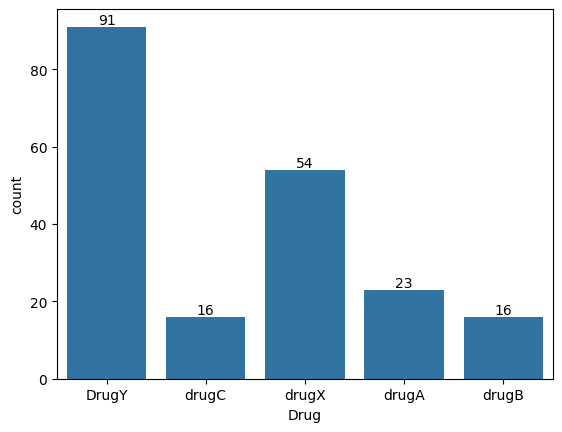

In [43]:
ax= sns.countplot(x=df['Drug'])

for i in ax.containers:
    ax.bar_label(i)

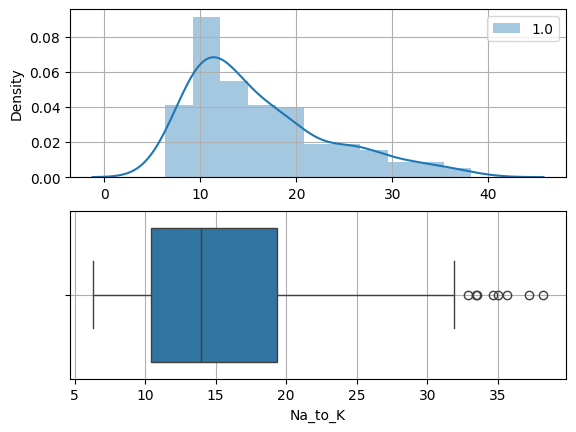

In [44]:
plt.subplot(2,1,1)
sns.distplot(x=df['Na_to_K'],label=df['Na_to_K'].skew().round())
plt.legend()
plt.grid()
plt.subplot(2,1,2)
sns.boxplot(x=df['Na_to_K'])
plt.grid()

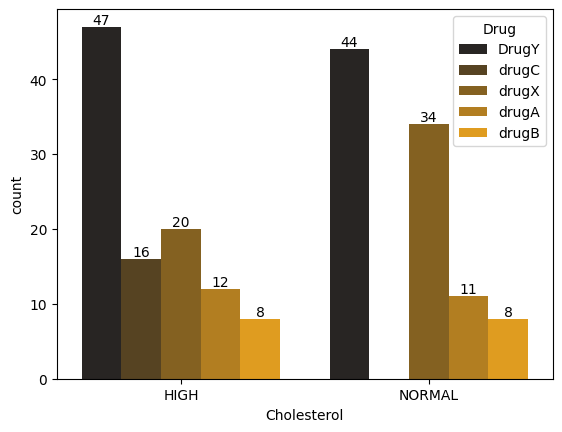

In [45]:
ax= sns.countplot(x=df['Cholesterol'],color="orange",hue=df['Drug'])
for i in ax.containers:
    ax.bar_label(i)

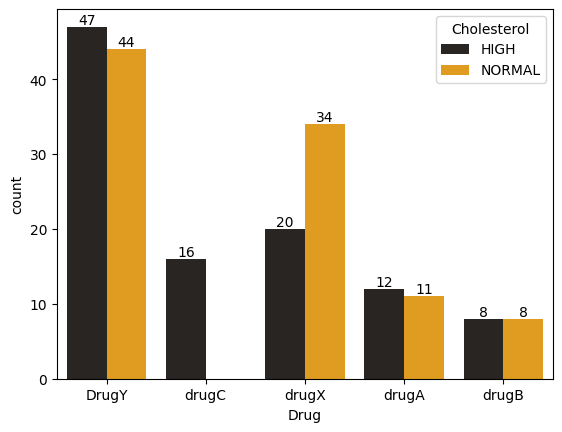

In [46]:
ax= sns.countplot(hue=df['Cholesterol'],color="orange",x=df['Drug'])
for i in ax.containers:
    ax.bar_label(i)

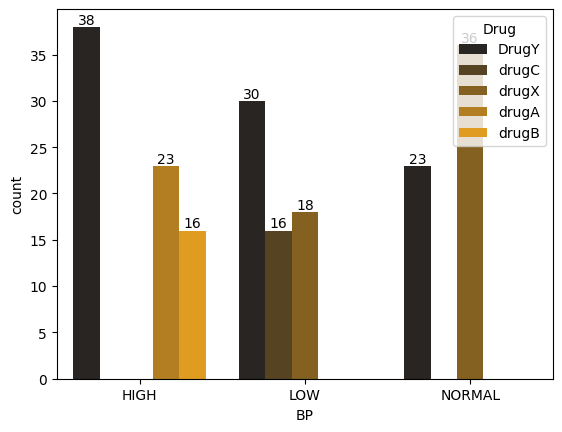

In [47]:
ax= sns.countplot(x=df['BP'],color="orange",hue=df['Drug'])
for i in ax.containers:
    ax.bar_label(i)

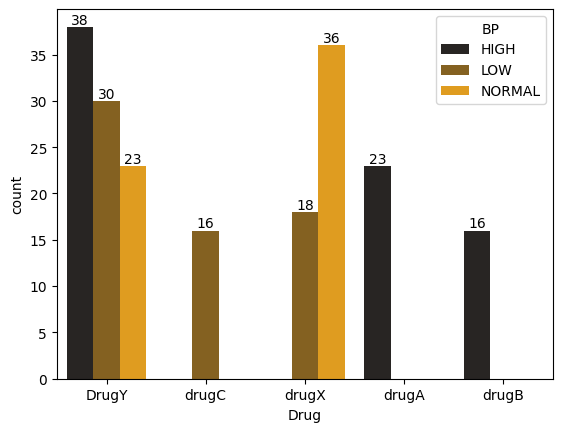

In [48]:
ax= sns.countplot(hue=df['BP'],color="orange",x=df['Drug'])
for i in ax.containers:
    ax.bar_label(i)

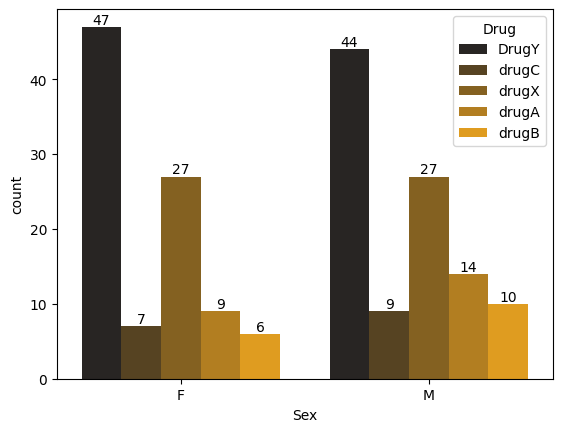

In [49]:
ax= sns.countplot(x=df['Sex'],color="orange",hue=df['Drug'])
for i in ax.containers:
    ax.bar_label(i)

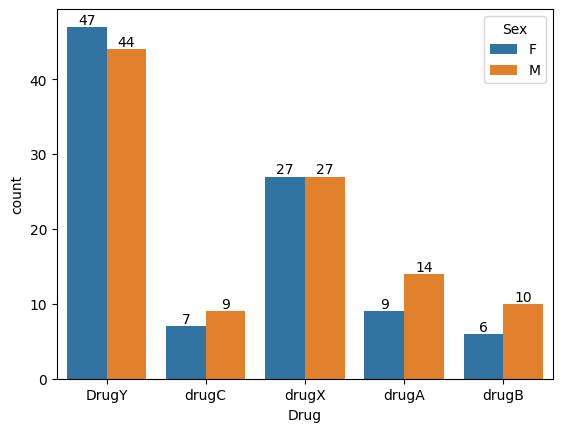

In [50]:
ax= sns.countplot(hue=df['Sex'],x=df['Drug'])
for i in ax.containers:
    ax.bar_label(i)

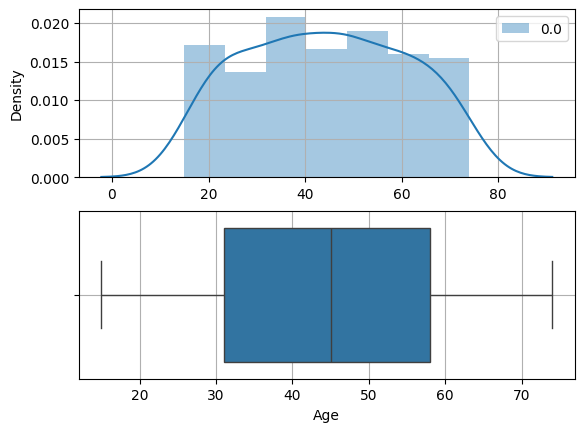

In [51]:
plt.subplot(2,1,1)
sns.distplot(x=df['Age'],label=df['Age'].skew().round())
plt.legend()
plt.grid()
plt.subplot(2,1,2)
sns.boxplot(x=df['Age'])
plt.grid()

In [52]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,200.0,NaN,NaN,NaN,44.315,16.544315,15.0,31.0,45.0,58.0,74.0
Sex,200,2,M,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BP,200,3,HIGH,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol,200,2,HIGH,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na_to_K,200.0,NaN,NaN,NaN,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Drug,200,5,DrugY,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN


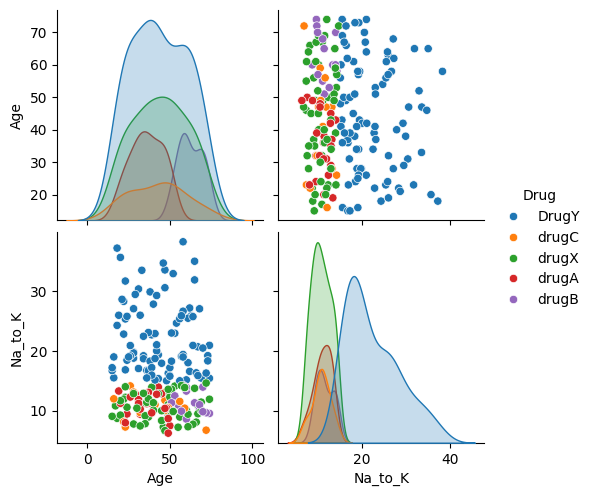

In [53]:
sns.pairplot(df,hue='Drug')

<Axes: xlabel='Age', ylabel='Density'>

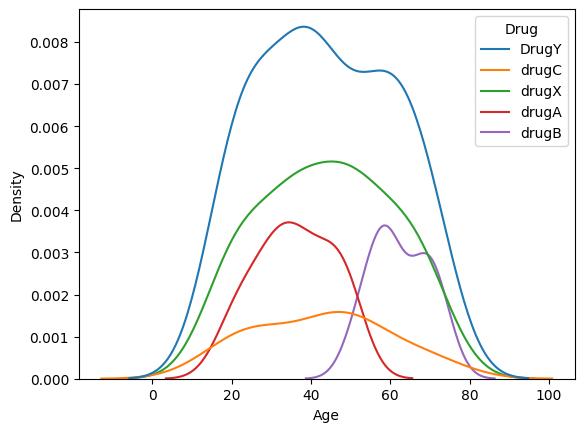

In [54]:
sns.kdeplot(x=df['Age'],hue=df['Drug'])

In [55]:
df.groupby('Drug')[['Age','Na_to_K']].agg(['min','mean','max']).round(2)

Age            Na_to_K              
      min   mean max     min   mean    max
Drug                                      
DrugY  15  43.75  74   15.02  22.37  38.25
drugA  19  35.87  50    6.27  10.92  13.97
drugB  51  62.50  74    8.62  11.52  14.24
drugC  16  42.50  72    6.77  10.63  14.16
drugX  15  44.02  74    6.68  10.65  14.64

In [56]:
df.groupby('Sex')[['Age','Na_to_K']].agg(['min','mean','max']).round(2)

Age            Na_to_K              
    min   mean max     min   mean    max
Sex                                     
F    15  42.56  74    6.68  17.02  38.25
M    15  45.93  74    6.27  15.22  35.64

In [57]:
df.groupby('BP')[['Age','Na_to_K']].agg(['min','mean','max']).round(2)

Age            Na_to_K              
       min   mean max     min   mean    max
BP                                         
HIGH    15  42.23  74    6.27  17.04  37.19
LOW     16  47.03  74    6.77  16.54  38.25
NORMAL  15  44.08  73    6.68  14.34  31.69

In [58]:
df.groupby('Cholesterol')[['Age','Na_to_K']].agg(['min','mean','max']).round(2)

Age            Na_to_K              
            min   mean max     min   mean    max
Cholesterol                                     
HIGH         15  45.41  74    6.77  16.01  38.25
NORMAL       15  43.15  74    6.27  16.16  35.64

In [59]:
df.groupby(['Sex','Cholesterol'])[['Age','Na_to_K']].agg(['min','mean','max']).round(2)

Age            Na_to_K              
                min   mean max     min   mean    max
Sex Cholesterol                                     
F   HIGH         18  44.51  74    7.48  16.92  38.25
    NORMAL       15  40.53  72    6.68  17.13  31.88
M   HIGH         15  46.22  74    6.77  15.20  31.69
    NORMAL       15  45.62  74    6.27  15.24  35.64

In [60]:
df.groupby(['Sex','Cholesterol','BP'])[['Age','Na_to_K']].agg(['min','mean','max']).round(2)

Age            Na_to_K              
                       min   mean max     min   mean    max
Sex Cholesterol BP                                         
F   HIGH        HIGH    18  41.94  73   10.98  19.72  37.19
                LOW     26  46.79  74    9.71  18.07  38.25
                NORMAL  22  45.17  73    7.48  13.37  20.49
    NORMAL      HIGH    15  34.52  68    9.94  18.42  31.88
                LOW     20  45.43  72    7.34  17.42  29.88
                NORMAL  18  45.33  68    6.68  14.54  27.05
M   HIGH        HIGH    23  50.67  74    7.49  14.73  30.37
                LOW     16  47.24  72    6.77  13.57  22.96
                NORMAL  15  41.11  64    7.76  17.09  31.69
    NORMAL      HIGH    15  42.95  74    6.27  15.47  35.64
                LOW     26  48.21  74    8.37  17.42  33.54
                NORMAL  17  46.30  67    7.26  10.64  15.79

In [61]:
X = df.drop(['Drug'],axis=1)
y = df['Drug']

<Axes: >

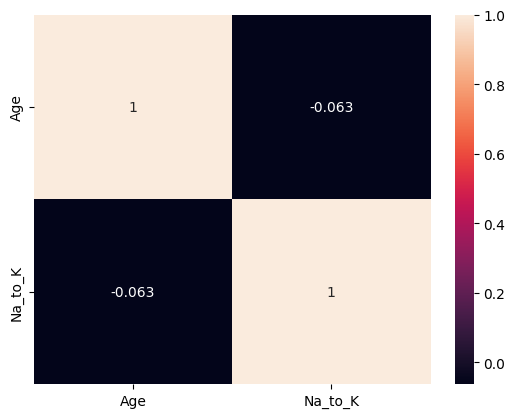

In [62]:
corr_x = X.select_dtypes(exclude="object").corr()

sns.heatmap(corr_x,annot=True)

In [63]:
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [64]:
num_col = X.columns.get_indexer_for(X.select_dtypes(exclude="object").columns).tolist()

cat_col = X.columns.get_indexer_for(X.select_dtypes(include="object").columns).tolist()

In [65]:
print(num_col)

print(cat_col)

[0, 4]
[1, 2, 3]


In [66]:
pipe1 = ColumnTransformer([
    ("simple_num",SimpleImputer(strategy="mean"),num_col),
    ("simple_cat",SimpleImputer(strategy="most_frequent"),cat_col)
    ])

In [67]:
pipe2 = ColumnTransformer([
    ("onehot",OneHotEncoder(sparse=False,handle_unknown="ignore"),cat_col)
])

In [68]:
pipeline_lre = ImbPipeline([
        ("pipe1",pipe1),
        ("pipe2",pipe2),

        # ("pipe4",LogisticRegression()),

])

In [69]:
pipeline_lre

Pipeline(steps=[('pipe1',
                 ColumnTransformer(transformers=[('simple_num', SimpleImputer(),
                                                  [0, 4]),
                                                 ('simple_cat',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [1, 2, 3])])),
                ('pipe2',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3])]))])

In [70]:
x_train , x_test, y_train , y_test = train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)

In [71]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
110,50,M,HIGH,HIGH,7.490
24,33,F,LOW,HIGH,33.486
101,45,F,HIGH,HIGH,12.854
76,36,F,HIGH,HIGH,11.198
125,19,F,HIGH,NORMAL,25.969
...,...,...,...,...,...
63,45,M,LOW,NORMAL,8.370
77,26,F,HIGH,NORMAL,19.161
145,61,M,NORMAL,HIGH,9.443
37,39,M,LOW,NORMAL,13.938


In [72]:
x_train_pre = pipeline_lre.fit_transform(x_train)
x_test = pipeline_lre.fit_transform(x_test)

In [73]:
# Apply SMOTE to oversample the minority class
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train_pre, y_train)

In [74]:
y.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [75]:
print(x_train.shape)

print(x_test.shape)

print(y_train.shape)

print(y_test.shape)

print(x_train_sm.shape)

print(y_train_sm.shape)


(160, 5)
(40, 45)
(160,)
(40,)
(365, 163)
(365,)


In [76]:
print(y_train_sm.value_counts(normalize=True))

print(y_test.value_counts(normalize=True))

Drug
drugA    0.2
DrugY    0.2
drugX    0.2
drugB    0.2
drugC    0.2
Name: proportion, dtype: float64
Drug
DrugY    0.450
drugX    0.275
drugA    0.125
drugB    0.075
drugC    0.075
Name: proportion, dtype: float64


In [77]:
# pipeline_lre.named_steps['pipe3'].fit_resample(X,y)

In [78]:
lre = LogisticRegression()

In [79]:
lre.fit(x_train_sm,y_train_sm)

print("Training score for lre :",lre.score(x_train_sm,y_train_sm).round(2)*100,"%")

print("Testing score for lre :",lre.score(x_test,y_test).round(2)*100,"%")

print('**'*20)

y_pred_lre = lre.predict(x_test)

acc_score  = accuracy_score(y_test,y_pred_lre)
print("accuracy_score for lre :",acc_score)

print('**'*20)

pre_score  = precision_score(y_test,y_pred_lre,average='weighted')
print("precision_score for lre :",pre_score)

print('**'*20)

rec_score  = recall_score(y_test,y_pred_lre,average='weighted')
print("recall_score for lre :",rec_score)

print('**'*20)

cnf_mat  = confusion_matrix(y_test,y_pred_lre)
print("confusion_matrix for lre :\n",cnf_mat)

print('**'*20)

clf_rpt  = classification_report(y_test,y_pred_lre)
print("classification_report for lre :\n",clf_rpt)

print('**'*20)


Training score for lre : 100.0 %


ValueError: X has 45 features, but LogisticRegression is expecting 163 features as input.

Overfitting issue is there

In [ ]:
print(y_train.value_counts(normalize=True))

print(y_test.value_counts(normalize=True))

Drug
DrugY    0.45625
drugX    0.26875
drugA    0.11250
drugB    0.08125
drugC    0.08125
Name: proportion, dtype: float64
Drug
DrugY    0.450
drugX    0.275
drugA    0.125
drugB    0.075
drugC    0.075
Name: proportion, dtype: float64
